<a href="https://colab.research.google.com/github/ahincho/robot-trading-challenge/blob/main/Robot-Trading-Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Robot Trading Challenge**

**a. Descripción:** El Challenge Robot Trading consiste en crear un Robot de Trading en Python para tomar decisiones de compra y venta de Bitcoin en tiempo real. El proyecto consta de los siguientes puntos que expondré a continuación.

**b. Configuración del Ambiente:** Configurar el entorno de desarrollo con Python 3.x y librerías clave.

**c. Obtención de Datos:** Obtener datos de precios históricos de Bitcoin a través de una API y datos actuales mediante Web Scraping.

**d. Limpieza de Datos:** Limpiar datos, eliminando outliers, valores nulos y duplicados, y calcular el precio promedio.

**e. Toma de Decisiones:** Tomar decisiones de compra/venta en tiempo real basadas en la comparación del precio actual y la tendencia.

**f. Visualización de Datos:** Visualizar datos utilizando Matplotlib para mostrar la evolución de los precios y las decisiones de trading.

**g. Automatización:** Automatizar el proceso de toma de decisiones y actualización de gráficos, ejecutándolo cada 5 minutos.


In [275]:
from IPython.display import Image

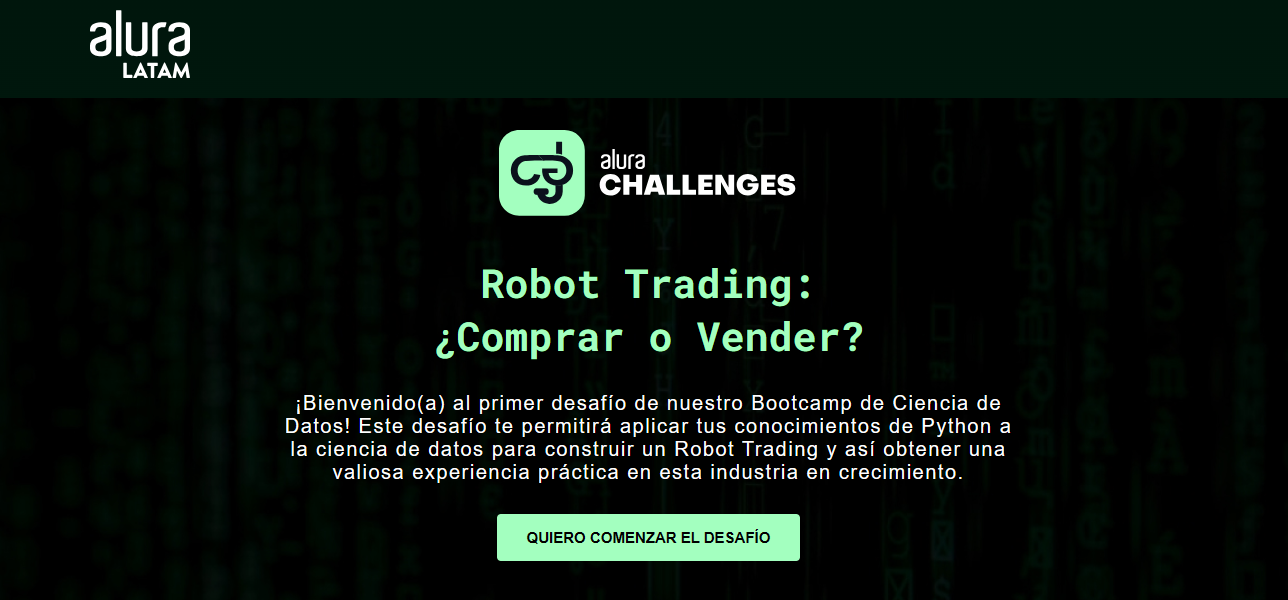

In [276]:
image_url = '/content/Enunciado.png'
Image(image_url)

## **1. Configuración del Ambiente**

In [277]:
# Version de Python
!python --version

Python 3.10.12


In [278]:
# Instalar Numpy
!python -m pip install numpy

In [279]:
# Instalar Pandas
!python -m pip install pandas

In [280]:
# Instalar Matplotlib
!python -m pip install matplotlib

In [281]:
# Importar las librerias
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize = (15, 10))

In [282]:
# Verificar las versiones
print(f'Numpy : {np.__version__}')
print(f'Pandas : {pd.__version__}')
print(f'Matplotlib : {matplotlib.__version__}')

Numpy : 1.23.5
Pandas : 1.5.3
Matplotlib : 3.7.1


In [283]:
# Variables globales
global df_bitcoin, current_bitcoin_price, trend, mean_bitcoin_price, decision_algorithm

## **2. Obtención de los Datos**

### **a. Información del Bitcoin con Yahoo Finance**

In [284]:
# Instalar la libreria Yahoo Finance : https://pypi.org/project/yfinance/
!pip3 install yfinance

In [285]:
# Importar la libreria de Yahoo Finance
import yfinance as yf

In [286]:
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  return history

In [287]:
# Debemos importar la libreria Datetime para trabajar con fechas
import datetime
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [288]:
# Revisando los datos o argumentos a utilizar
print(f'Ticker : {bitcoin_ticker}')
print(f'Interval : {interval}')
print(f'Start Date : {start}')
print(f'End Date : {end}')

Ticker : BTC-USD
Interval : 5m
Start Date : 2023-11-03
End Date : 2023-11-11


In [289]:
# Recuperamos la informacion del Bitcoin usando 'yfinance'
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [290]:
# Revisamos el tipo de dato que devuelve Ticker e History
type(df_bitcoin)

pandas.core.frame.DataFrame

In [291]:
# Devuelve un Dataframe, vamos revisar algunas filas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-03 00:00:00+00:00,34942.472656,34942.472656,34883.429688,34883.429688,0,0.0,0.0
2023-11-03 00:05:00+00:00,34866.761719,34883.429688,34852.617188,34870.574219,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:25:00+00:00,34833.437500,34833.437500,34801.046875,34803.000000,0,0.0,0.0
2023-11-03 00:30:00+00:00,34789.164062,34789.164062,34770.187500,34770.187500,0,0.0,0.0
2023-11-03 00:35:00+00:00,34753.316406,34753.316406,34665.085938,34665.085938,11558912,0.0,0.0
2023-11-03 00:40:00+00:00,34713.839844,34731.152344,34713.839844,34731.152344,2750464,0.0,0.0


In [292]:
# Revisamos los ultimos registros
df_bitcoin.sort_values(by = 'Datetime', ascending = False)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0,0.0,0.0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0,0.0,0.0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0,0.0,0.0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0,0.0,0.0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0,0.0,0.0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0,0.0,0.0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0,0.0,0.0


In [293]:
# Reorganizar el dataframe para tener a la mano los ultimos registros
df_bitcoin = df_bitcoin.sort_values(by = 'Datetime', ascending = False)

In [294]:
# Revisar los primeros registros del Dataframe
df_bitcoin.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0,0.0,0.0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0,0.0,0.0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0,0.0,0.0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0,0.0,0.0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384,0.0,0.0


### **b. Análisis de la Información de Yahoo Finance**

In [295]:
# Es un Dataframe de Pandas, usamos todas las operaciones comunes
# No tenemos ningun registro nulo de momento
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1965 entries, 2023-11-10 04:00:00+00:00 to 2023-11-03 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1965 non-null   float64
 1   High          1965 non-null   float64
 2   Low           1965 non-null   float64
 3   Close         1965 non-null   float64
 4   Volume        1965 non-null   int64  
 5   Dividends     1965 non-null   float64
 6   Stock Splits  1965 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 122.8 KB


In [296]:
# Estadistica Descriptiva
# Para que la API de Yahoo Finance ya no expone 'Dividends' ni 'Splits
# El Bitcoin en todos sus precios varia entre un 1% y 2%
df_bitcoin.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03,1965.0,1965.0
mean,35274.328694,35290.763907,35258.474616,35275.147565,2.369726e+07,0.0,0.0
std,686.080981,693.120787,678.808717,686.181654,5.956838e+07,0.0,0.0
min,34154.750000,34154.750000,34154.750000,34154.750000,0.000000e+00,0.0,0.0
25%,34805.117188,34815.531250,34795.695312,34807.636719,0.000000e+00,0.0,0.0
50%,35061.449219,35079.101562,35052.105469,35061.210938,2.417664e+06,0.0,0.0
75%,35385.570312,35402.460938,35373.179688,35389.019531,2.208973e+07,0.0,0.0
max,37904.132812,37926.257812,37810.367188,37926.257812,8.399258e+08,0.0,0.0


In [297]:
# Podemos desechar las columnas 'dividends' y 'stock splits'
df_bitcoin.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [298]:
# Observamos nuestro Dataframe despues de dropear las columnas
df_bitcoin.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384
2023-11-10 03:35:00+00:00,36742.363281,36789.019531,36742.363281,36789.019531,0
2023-11-10 03:30:00+00:00,36782.601562,36782.855469,36728.785156,36732.511719,1359872
2023-11-10 03:25:00+00:00,36789.996094,36791.222656,36775.066406,36791.222656,0
2023-11-10 03:20:00+00:00,36841.894531,36841.894531,36809.566406,36810.421875,0


In [299]:
# Seria bueno redefinir la funcion para evitar los datos nulos o vacios
# Recuperar los datos historicos de la ultima semana en intervalos de 5m
def import_financial_database(ticker, interval, start, end):
  data = yf.Ticker(ticker)
  history = data.history(interval = interval, start = start, end = end)
  history.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)
  history = history.sort_values(by = 'Datetime', ascending = False)
  return history

In [300]:
# Definimos el activo que vamos a recuperar y el periodo
bitcoin_ticker = 'BTC-USD'
interval = '5m'
today = datetime.date.today()
start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')

In [301]:
# Importamos nuevamente nuestro historico del Bitcoin
df_bitcoin = import_financial_database(bitcoin_ticker, interval, start, end)

In [302]:
# Revision y estadistica descriptiva
df_bitcoin.describe()

,Open,High,Low,Close,Volume
count,1965.000000,1965.000000,1965.000000,1965.000000,1.965000e+03
mean,35274.328694,35290.763907,35258.474616,35275.147565,2.369726e+07
std,686.080981,693.120787,678.808717,686.181654,5.956838e+07
min,34154.750000,34154.750000,34154.750000,34154.750000,0.000000e+00
25%,34805.117188,34815.531250,34795.695312,34807.636719,0.000000e+00
50%,35061.449219,35079.101562,35052.105469,35061.210938,2.417664e+06
75%,35385.570312,35402.460938,35373.179688,35389.019531,2.208973e+07
max,37904.132812,37926.257812,37810.367188,37926.257812,8.399258e+08


<Axes: >

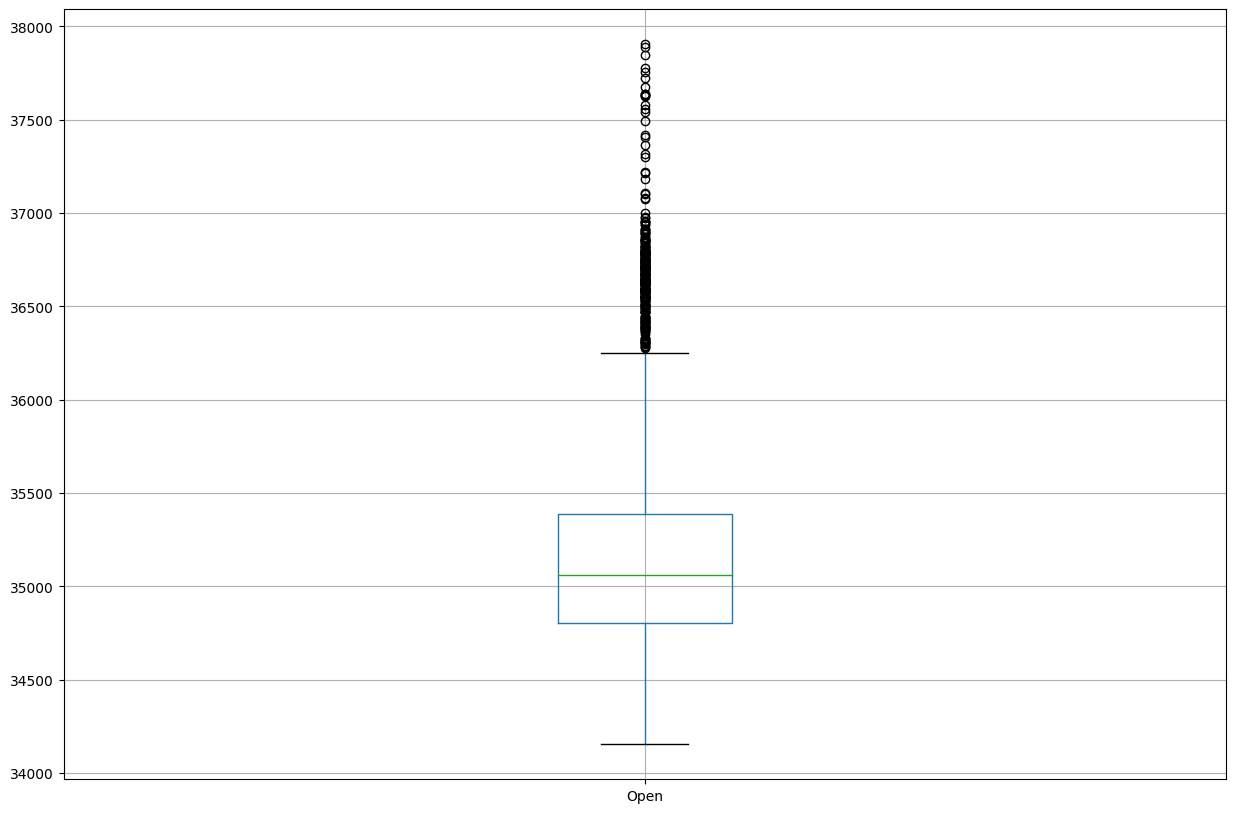

In [303]:
# Grafico de Caja para la variable Open
# Como vemos hay mucho ruido en los valores, tal vez por la volatilidad
df_bitcoin.boxplot('Open')

<Axes: >

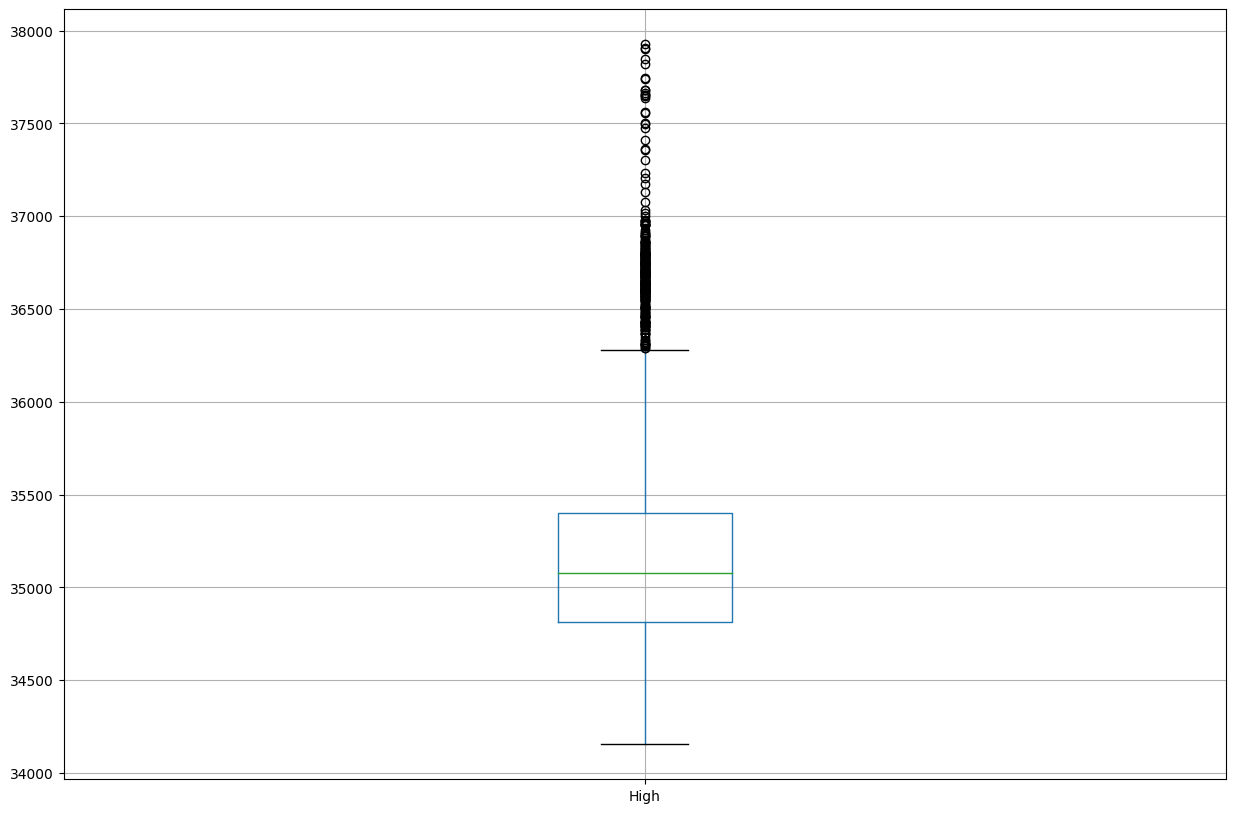

In [304]:
# Grafico de Caja para la variable High
# Aqui tambien existe mucho ruido y outliers
df_bitcoin.boxplot('High')

<Axes: >

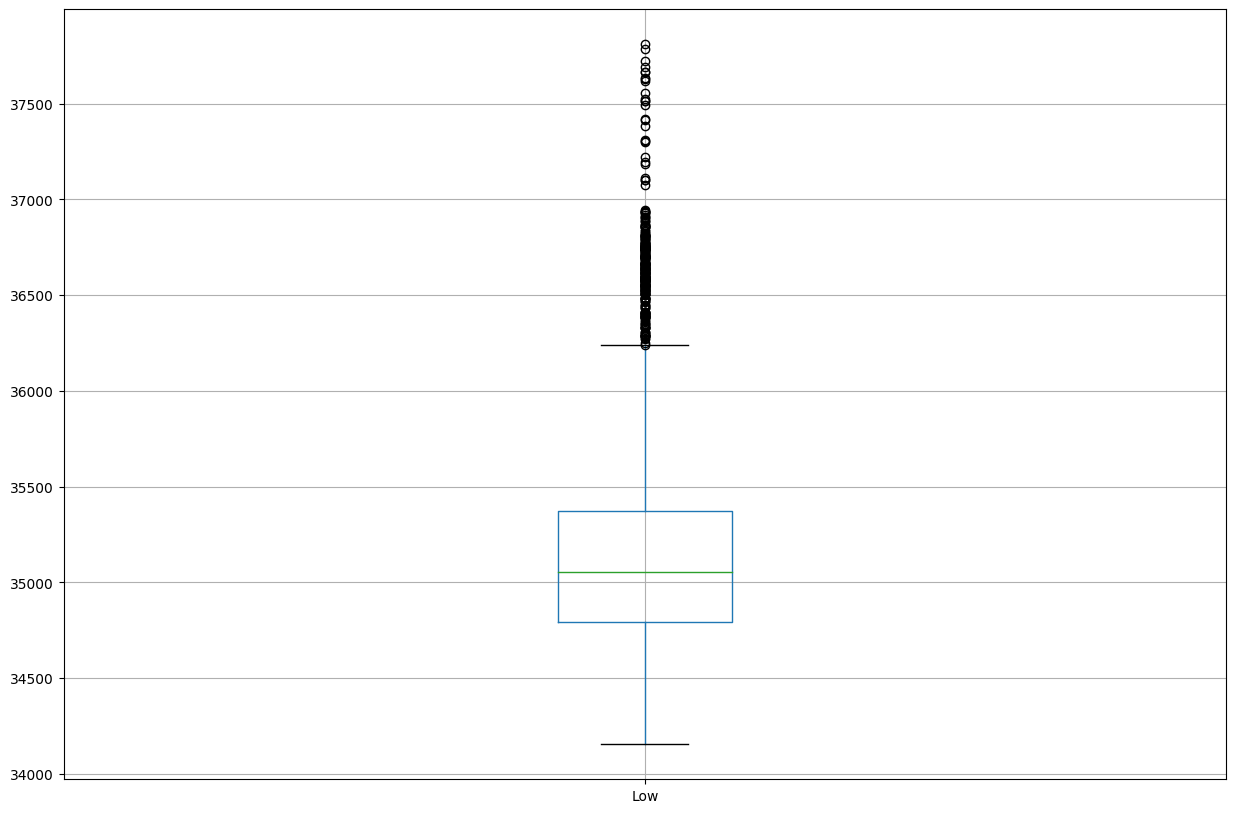

In [305]:
# Grafico de Caja para la variable Low
df_bitcoin.boxplot('Low')

<Axes: >

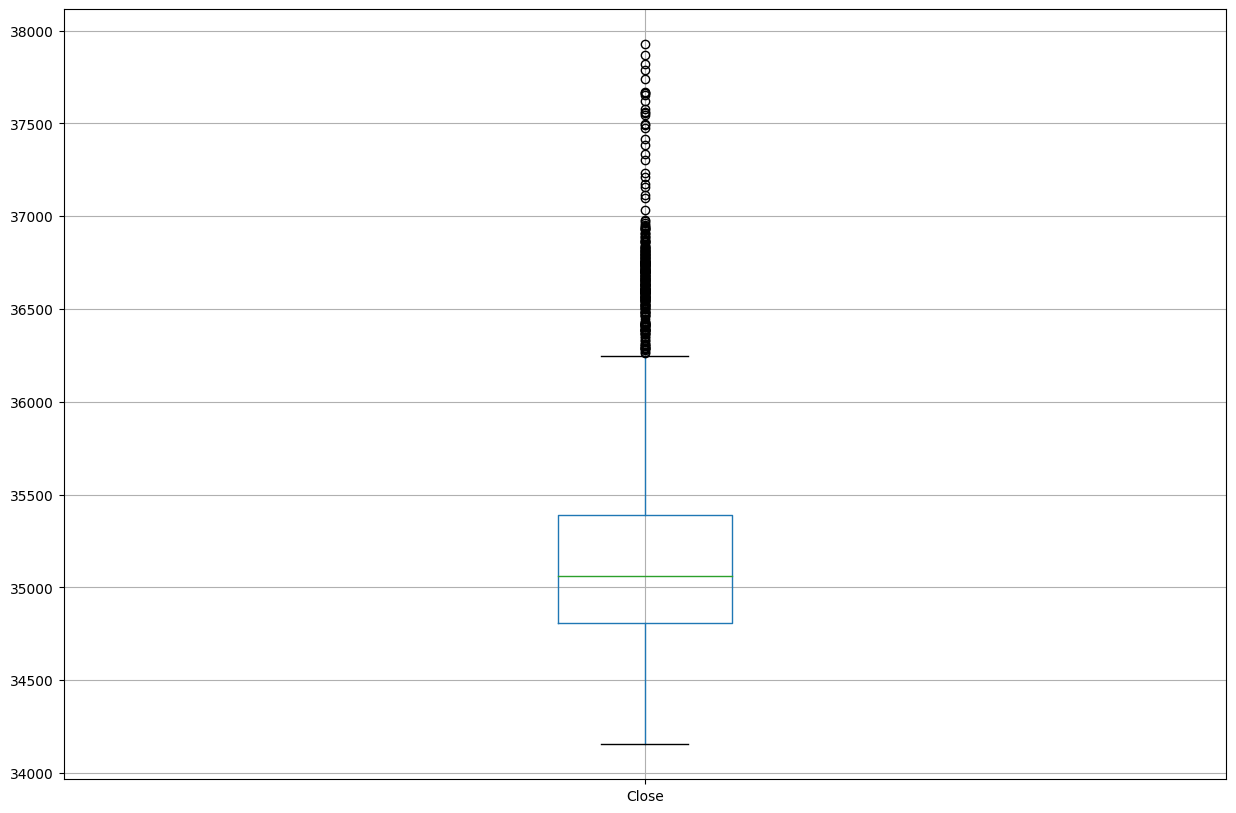

In [306]:
# Grafico de Caja para la variable Close
df_bitcoin.boxplot('Close')

<Axes: >

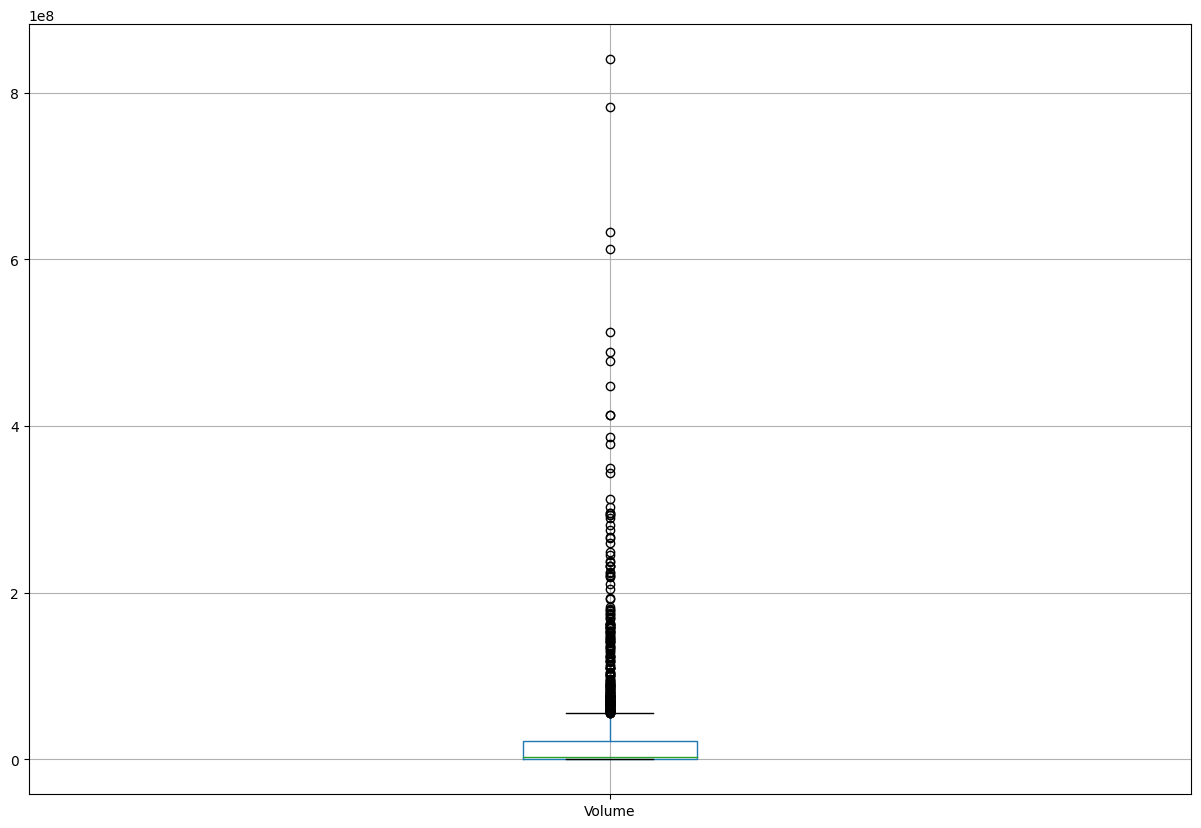

In [343]:
# Grafico de Caja para la variable Volume
df_bitcoin.boxplot('Volume')

In [344]:
# Tenemos las siguientes variables en nuestro Dataframe
list(df_bitcoin.columns)

['Open', 'High', 'Low', 'Close', 'Volume']

In [309]:
# Reutilizamos la funcion anterior en la funcion 'import_bitcoin_database'
def import_bitcoin_database():
  today = datetime.date.today()
  start = (today - datetime.timedelta(days = 7)).strftime('%Y-%m-%d')
  end = (today + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')
  bitcoin_history = import_financial_database('BTC-USD', '5m', start, end)
  return bitcoin_history

In [310]:
# Asignamos finalmente el valor para la variable 'df_bitcoin'
df_bitcoin = import_bitcoin_database()
df_bitcoin.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384
2023-11-10 03:35:00+00:00,36742.363281,36789.019531,36742.363281,36789.019531,0
2023-11-10 03:30:00+00:00,36782.601562,36782.855469,36728.785156,36732.511719,1359872
2023-11-10 03:25:00+00:00,36789.996094,36791.222656,36775.066406,36791.222656,0
2023-11-10 03:20:00+00:00,36841.894531,36841.894531,36809.566406,36810.421875,0


### **c. Obtener las Tendencias usando Web Scraping**

In [311]:
# Para ello vamos a utilizar la siguiente pagina web
coin_market_url = 'https://coinmarketcap.com/'

In [312]:
# Vamos a empezar con nuestro Web Scraping
# Importamos las librerias de Request y Beautiful Soup
import requests
from bs4 import BeautifulSoup

In [313]:
# Recuperamos el contenido del endpoint para el Bitcoin
response = requests.get(coin_market_url)

In [314]:
# Verificamos que la respuesta haya sido exitosa
print(response)

<Response [200]>


In [315]:
# Parseamos el contenido a un objeto de Beautiful Soup
html = response.text
soup = BeautifulSoup(html, 'html.parser')

In [316]:
# Vamos a buscar la celda en la table que contiene la informacion del bitcoin
bitcoin_row = soup.find('a', {'href': "/currencies/bitcoin/#markets"})

In [317]:
# Ahora recuperaremos el precio actual del bitcoin
bitcoin_current_price = bitcoin_row.find('span').get_text(strip = True)

In [318]:
# Revisamos el precio actual del bitcoin
print(bitcoin_current_price)

$36,737.55


In [319]:
# Eliminamos los simbolos del dolar y las comas millares
bitcoin_current_price = bitcoin_current_price.replace('$', '').replace(',', '')

In [320]:
# Verificamos nuevamente el precio actual del bitcoin
print(bitcoin_current_price)

36737.55


In [321]:
# Convertimos el precio actual a formato punto flotante
bitcoin_current_price = float(bitcoin_current_price)

In [322]:
# Verificamos el precio actual del bitcoin
print(type(bitcoin_current_price))
print(bitcoin_current_price)

<class 'float'>
36737.55


In [323]:
# Recuperamos la variacion del bitcoin en la ultima hora
bitcoin_row = soup.find('span', {'class': ['sc-d55c02b-0 iwhBxy', 'sc-d55c02b-0 gUnzUB']})

In [324]:
# Visualizamos la informacion
print(bitcoin_row)

<span class="sc-d55c02b-0 gUnzUB"><span class="icon-Caret-down" style="width:12px;height:18px;display:inline-block"></span>0.34%</span>


In [325]:
# Guardamos la informacion sobre la tendencia
current_trend = bitcoin_row.get_text(strip = True).replace('%', '')
print(current_trend)

0.34


In [326]:
# Convertimos el texto a un tipo punto flotante
current_trend = float(current_trend)
print(type(current_trend))
print(current_trend)

<class 'float'>
0.34


In [327]:
# Identificar si la tendencia esta en alta o en baja segun el signo
trend = 'Rise' if current_trend >= 0 else 'Fall'
print(trend)

Rise


In [328]:
# Una vez experimentado lo anteriores creamos la funcion 'get_bitcoin_trends'
def get_bitcoin_trends():
  response = requests.get('https://coinmarketcap.com/')
  bitcoin_row = soup.find('a', {'href': "/currencies/bitcoin/#markets"})
  bitcoin_current_price = bitcoin_row.find('span').get_text(strip = True)
  bitcoin_current_price = bitcoin_current_price.replace('$', '').replace(',', '')
  bitcoin_current_price = float(bitcoin_current_price)
  bitcoin_row = soup.find('span', {'class': ['sc-d55c02b-0 iwhBxy', 'sc-d55c02b-0 gUnzUB']})
  current_trend = bitcoin_row.get_text(strip = True).replace('%', '')
  current_trend = float(current_trend)
  trend = 'Rise' if current_trend >= 0 else 'Fall'
  return [bitcoin_current_price, current_trend, trend]

In [329]:
# Finalmente llamamos a la funcion para probar su funcionalidad
get_bitcoin_trends()

[36737.55, 0.34, 'Rise']

## **3. Limpieza de los Datos**

In [330]:
# Para ello debemos llamar a nuestra funcion 'import_bitcoin_database'
df_bitcoin_clean = import_bitcoin_database()

In [331]:
# Vamos a revisar si los indices en Date se repiten
# De momento ninguno se repite pero debemos eliminarlos en caso suceda
df_bitcoin_clean.index.duplicated().sum()

0

In [332]:
# Eliminamos los indices repetidos del Dataframe
df_bitcoin_clean = df_bitcoin_clean[~df_bitcoin_clean.index.duplicated()]

In [333]:
# Volvemos a revisar si existe duplicado alguno
df_bitcoin_clean.index.duplicated().sum()

0

In [334]:
# Nuestro analisis se realizara sobre la columna Close
# Primero vamos a buscar aquellos valores que sean nulos
df_bitcoin_clean.Close.isna().sum()

0

In [335]:
# En caso de existir un valor nulo en Close vamos a llenarlo con la media
df_bitcoin_clean.fillna(df_bitcoin_clean.Close.mean())

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384
...,...,...,...,...,...
2023-11-03 00:20:00+00:00,34851.636719,34853.625000,34843.449219,34843.449219,0
2023-11-03 00:15:00+00:00,34885.660156,34885.660156,34830.425781,34830.425781,0
2023-11-03 00:10:00+00:00,34876.261719,34910.273438,34876.261719,34891.488281,0


In [336]:
# Nuevamente buscamos por valores que sean nulos
df_bitcoin_clean.Close.isna().sum()

0

In [337]:
# Revisamos los primero registros del Dataframe
df_bitcoin_clean.head(10)

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-11-10 04:00:00+00:00,36737.550781,36741.574219,36736.390625,36736.390625,0
2023-11-10 03:55:00+00:00,36759.929688,36759.929688,36741.988281,36741.988281,0
2023-11-10 03:50:00+00:00,36769.105469,36769.105469,36752.398438,36754.414062,0
2023-11-10 03:45:00+00:00,36765.054688,36797.816406,36765.054688,36781.160156,0
2023-11-10 03:40:00+00:00,36796.519531,36796.519531,36762.445312,36768.066406,10256384
2023-11-10 03:35:00+00:00,36742.363281,36789.019531,36742.363281,36789.019531,0
2023-11-10 03:30:00+00:00,36782.601562,36782.855469,36728.785156,36732.511719,1359872
2023-11-10 03:25:00+00:00,36789.996094,36791.222656,36775.066406,36791.222656,0
2023-11-10 03:20:00+00:00,36841.894531,36841.894531,36809.566406,36810.421875,0


In [347]:
# Ahora vamos a buscar los valores que sean menores a 0 en 'Volume'
df_bitcoin_clean.Volume.lt(0).sum()

0

In [353]:
# En caso encontrar un valor menor a 0 en 'Volume' hay que dropearlo
df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Volume.ge(0)]

<Axes: >

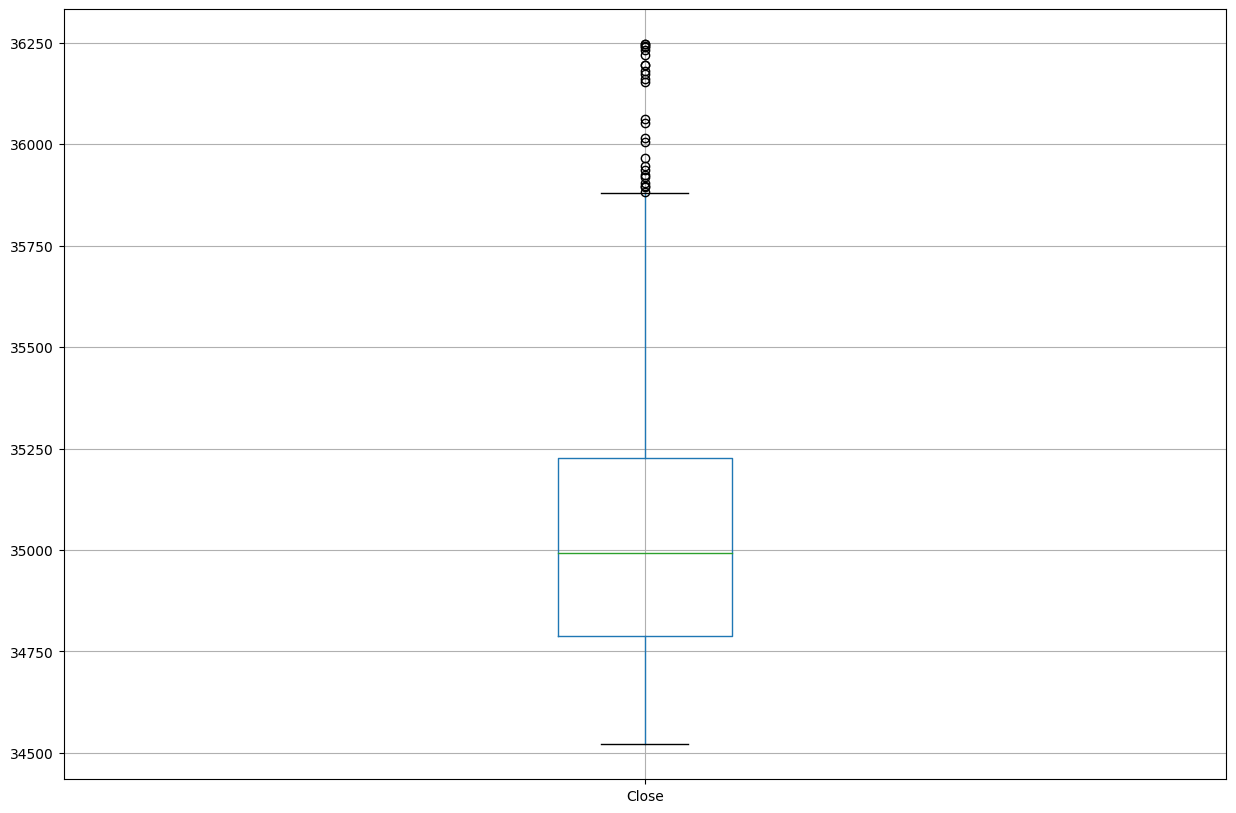

In [358]:
# Ahora vamos a identificar los outliers en la columna Close
df_bitcoin_clean.boxplot('Close')

In [359]:
# Para poder corregir estos outliers vamos a iteras por cada una de las
# columnas o atributos del Dataframe calculando sus estadisticos
close = df_bitcoin_clean['Close']
close_q1 = close.quantile(0.25).round(2)
close_q3 = close.quantile(0.75).round(2)
close_iiq = (close_q3 - close_q1).round(2)
close_low_lim = (close_q3 - 1.5 * close_iiq).round(2)
close_up_lim = (close_q3 + 1.5 * close_iiq).round(2)

In [361]:
# Una vez calculados los rangos intercuartiles vamos a revisarlos
print(f'Close Q1: {close_q1}')
print(f'Close Q3: {close_q3}')
print(f'Close IIQ: {close_iiq}')
print(f'Close Low Limit: {close_low_lim}')
print(f'Close Upper Limit: {close_up_lim}')

Close Q1: 34788.95
Close Q3: 35226.62
Close IIQ: 437.67
Close Low Limit: 34570.12
Close Upper Limit: 35883.12


In [364]:
# Dropear los valores que no se encuentren en el rango intercuartil
df_bitcoin_clean = df_bitcoin_clean[df_bitcoin_clean.Close.between(close_q1, close_q3)]

<Axes: >

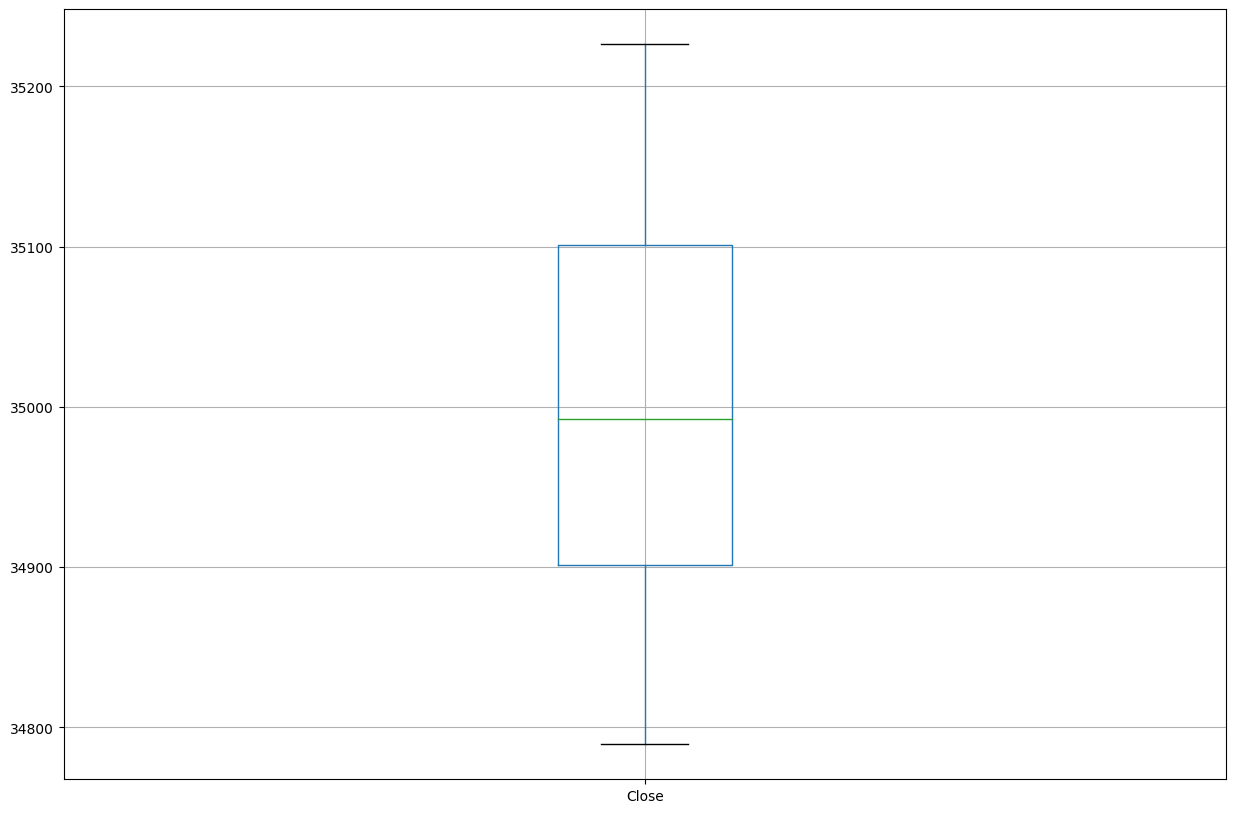

In [365]:
# Una vez dropeados vamos a volver a ver los graficos de caja
df_bitcoin_clean.boxplot('Close')

In [368]:
# Con los datos limpios vamos a recuperar el precio promedio del Bitcoin
mean_bitcoin_price = df_bitcoin_clean.Close.mean().round(4)

In [370]:
# Visualizamos el precio promedio del Bitcoin
print(f'{mean_bitcoin_price} USD')

35000.8538 USD


## **4. Toma de Decisiones**